# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

# Seleccion de modelo para baseline

Para la seleccion de un baseline se usaran 3 modelos para comparar su desempeño, estos seran SVC, Modelo2, Modelo3. Una vez analizados y comparados, se eleigira el modelo con un mejor desempeño, y de en base a los resultados obtenidos en este, se definiran la metrica que mejor se ajuste al problema en particular y el dese,peño minimo a obtener.

In [1]:
!pip install lazypredict

In [24]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix

In [3]:
X = pd.read_csv('/content/DTCPep_pca_pfeatures.csv')
y = pd.read_csv('/content/DTCPep_y.csv')

In [4]:
print(X.shape)
print(y.shape)

(8091, 18)
(8091, 1)


# Separar datasets en train y test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state =4, stratify=y_train)

# Comparar modelos usando lazypredict

In [9]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

 97%|█████████▋| 31/32 [00:28<00:00,  1.42it/s]

[LightGBM] [Info] Number of positive: 2101, number of negative: 4371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324629 -> initscore=-0.732578
[LightGBM] [Info] Start training from score -0.732578


100%|██████████| 32/32 [00:29<00:00,  1.09it/s]


In [ ]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LabelPropagation,1.00,1.00,1.00,1.00,1.00,6.76
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.06
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.56
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,2.04
LabelSpreading,1.00,1.00,1.00,1.00,1.00,8.04
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,8.60
XGBClassifier,1.00,1.00,1.00,1.00,0.99,160.17
BaggingClassifier,0.99,0.98,0.98,0.99,0.97,2.92
LGBMClassifier,0.94,0.92,0.92,0.94,0.86,388.56


In [ ]:
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 31/32 [03:44<00:26, 26.74s/it]

[LightGBM] [Info] Number of positive: 2101, number of negative: 4371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 6472, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324629 -> initscore=-0.732578
[LightGBM] [Info] Start training from score -0.732578


100%|██████████| 32/32 [10:05<00:00, 18.92s/it]


In [ ]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LabelPropagation,1.00,1.00,1.00,1.00,1.00,6.57
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.06
DecisionTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.58
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,2.17
LabelSpreading,1.00,1.00,1.00,1.00,1.00,7.26
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,7.19
XGBClassifier,1.00,1.00,1.00,1.00,0.99,176.07
BaggingClassifier,0.99,0.98,0.98,0.99,0.98,3.06
LGBMClassifier,0.94,0.92,0.92,0.94,0.86,380.69


[(0.0, 1.0)]

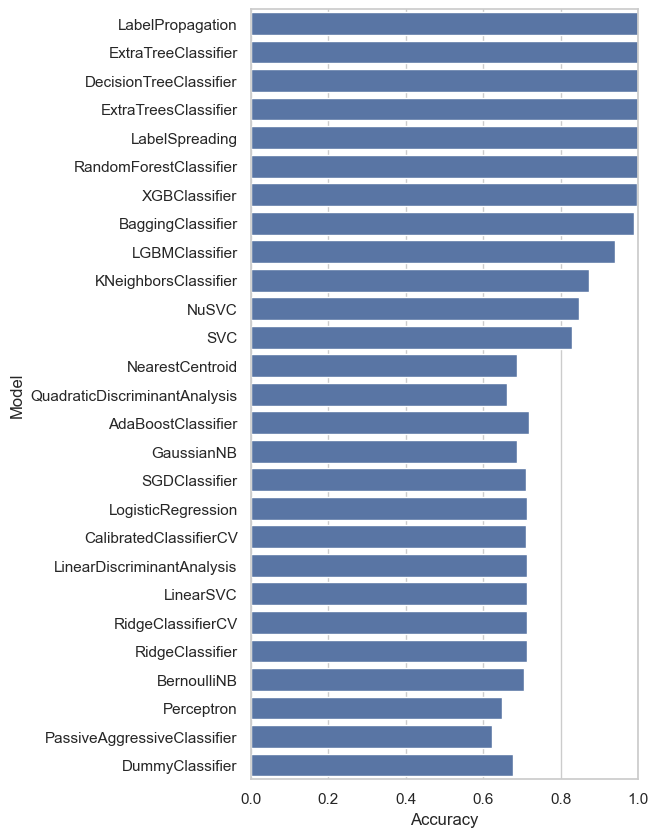

In [ ]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

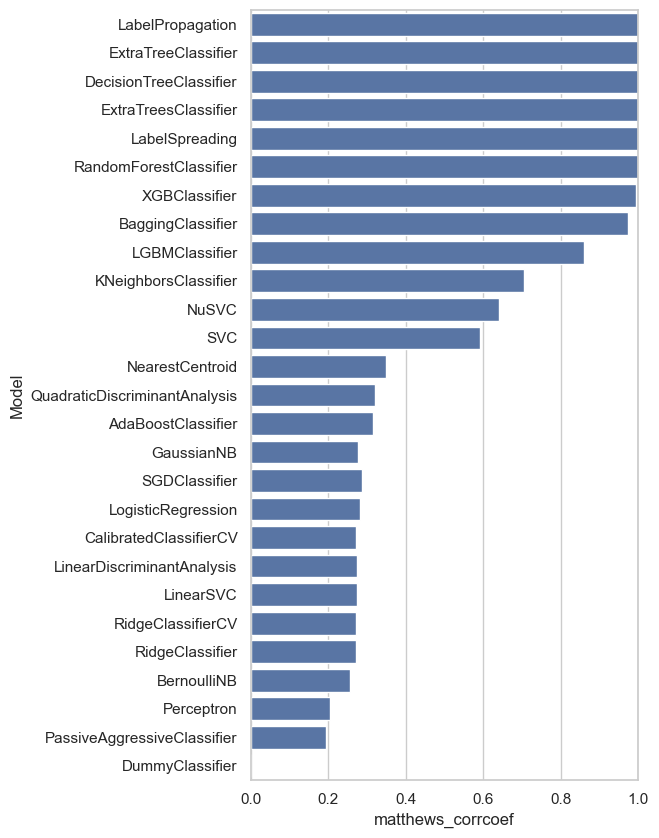

In [ ]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

# Modelo SVC

Un clasificador de vectores de soporte es un tipo de modelo de aprendizaje automático que se puede utilizar para tareas de clasificación. Dado un conjunto de ejemplos de entrenamiento, cada uno etiquetado como perteneciente a una de dos clases, el objetivo del clasificador de vectores de soporte es encontrar un límite de decisión que separe al máximo las dos clases.
Matemáticamente, podemos representar el límite de decisión como una función lineal de la forma

![image.png](attachment:image.png)

 donde w es un vector de pesos, x es un vector de características y b es un término de sesgo. El límite de decisión es el conjunto de puntos que satisfacen esta ecuación. Para encontrar el límite de decisión que separa al máximo las dos clases, podemos resolver el siguiente problema de optimización:

![image-2.png](attachment:image-2.png)

donde C es un parámetro de regularización que controla el equilibrio entre maximizar el margen y minimizar el error, i es la etiqueta del i-ésimo ejemplo de entrenamiento (ya sea 1 o -1) y x i es el vector de características correspondiente. Este problema de optimización se puede resolver mediante programación cuadrática.

La máquina de vectores de soporte es una representación de los datos de entrenamiento como puntos en el espacio separados en categorías por un espacio claro que es lo más amplio posible. Luego, los nuevos ejemplos se asignan a ese mismo espacio y se predice que pertenecen a una categoría según el lado del espacio en el que se encuentran.[1]

In [ ]:


param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','sigmoid']
              }

svc_grid = grid = GridSearchCV(SVC(random_state = 4), param_grid, refit = True, verbose = 3, n_jobs = -1)




In [ ]:
svc_grid.fit(X_train, y_train)




Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=SVC(random_state=4), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01, random_state=4)


In [ ]:
y_train_pred_svc = grid.predict(X_train)

In [ ]:
print(' Train Report \n')
print(classification_report(y_train, y_train_pred_svc, target_names=['positive','negative']))

 Train Report 

              precision    recall  f1-score   support

    positive       0.90      0.96      0.93      4371
    negative       0.91      0.79      0.84      2101

    accuracy                           0.91      6472
   macro avg       0.91      0.88      0.89      6472
weighted avg       0.91      0.91      0.90      6472



 Train CM 



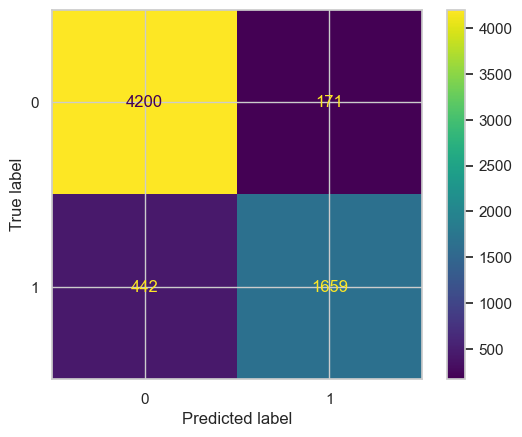

In [ ]:
print(' Train CM \n')
cm_svc = confusion_matrix(y_train, y_train_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.show()

In [ ]:
y_val_pred_svc = grid.predict(X_val)

In [ ]:
print(' Val Report \n')
print(classification_report(y_val, y_val_pred_svc, target_names=['positive','negative']))

 Val Report 

              precision    recall  f1-score   support

    positive       0.91      0.96      0.94       875
    negative       0.92      0.81      0.86       420

    accuracy                           0.91      1295
   macro avg       0.91      0.89      0.90      1295
weighted avg       0.91      0.91      0.91      1295



Val CM 



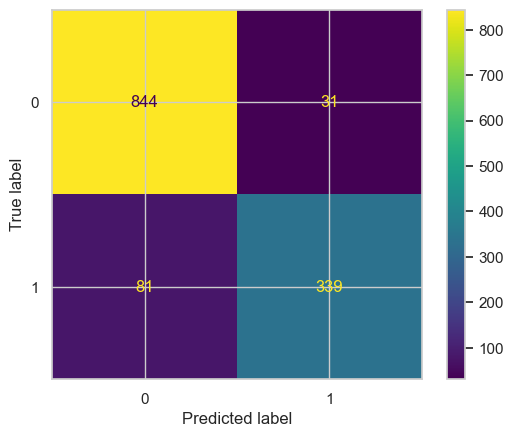

In [ ]:
print('Val CM \n')
cm_svc = confusion_matrix(y_val, y_val_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.show()

In [ ]:
y_test_pred_svc = grid.predict(X_test)

In [ ]:
print(' Test Report \n')
print(classification_report(y_test, y_test_pred_svc, target_names=['positive','negative']))

 Test Report 

              precision    recall  f1-score   support

    positive       0.90      0.96      0.93      3496
    negative       0.90      0.79      0.84      1681

    accuracy                           0.90      5177
   macro avg       0.90      0.87      0.89      5177
weighted avg       0.90      0.90      0.90      5177



 Test CM 



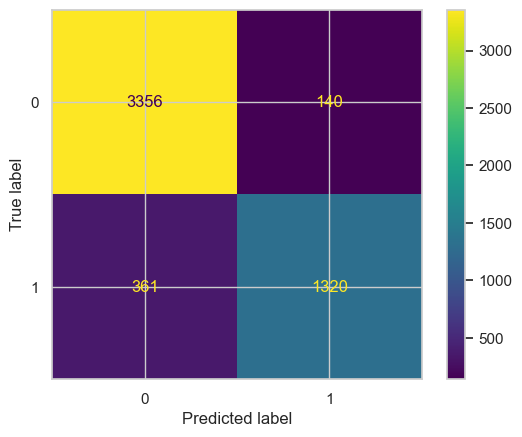

In [ ]:
print(' Test CM \n')
cm_svc = confusion_matrix(y_test, y_test_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot()
plt.show()

In [ ]:
with open("../models/svc_model.pkl", "wb") as f:
    pickle.dump(svc_grid.best_estimator_, f)
print("SVC Model saved")

SVC Model saved


# Modelo 2

In [110]:


sgd_param_grid = {'loss': ['hinge', 'log_loss', 'perceptron'],
              'penalty': ['l2','elasticnet'],
              'alpha': [0.0001, 0.001, 0.01],
              'max_iter': [10000, 1000, 500, 100],
              'learning_rate': ['optimal', 'constant', 'adaptive']
              }

sgd_grid = GridSearchCV(SGDClassifier(random_state = 4, n_jobs=-1, early_stopping = True  ), sgd_param_grid, refit = True, verbose = 3)



In [111]:
sgd_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=10000, penalty=l2;, score=0.627 total time=   0.1s
[CV 2/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=10000, penalty=l2;, score=0.686 total time=   0.1s
[CV 3/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=10000, penalty=l2;, score=0.630 total time=   0.1s
[CV 4/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=10000, penalty=l2;, score=0.658 total time=   0.1s
[CV 5/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=10000, penalty=l2;, score=0.661 total time=   0.1s
[CV 1/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.641 total time=   0.1s
[CV 2/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_iter=10000, penalty=elasticnet;, score=0.619 total time=   0.1s
[CV 3/5] END alpha=0.0001, learning_rate=optimal, loss=hinge, max_

GridSearchCV(estimator=SGDClassifier(early_stopping=True, n_jobs=-1,
                                     random_state=4),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'learning_rate': ['optimal', 'constant', 'adaptive'],
                         'loss': ['hinge', 'log_loss', 'perceptron'],
                         'max_iter': [10000, 1000, 500, 100],
                         'penalty': ['l2', 'elasticnet']},
             verbose=3)

In [112]:

# print best parameter after tuning
print(sgd_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(sgd_grid.best_estimator_)


{'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 10000, 'penalty': 'elasticnet'}
SGDClassifier(alpha=0.01, early_stopping=True, max_iter=10000, n_jobs=-1,
              penalty='elasticnet', random_state=4)


In [113]:
y_train_pred_sgd = sgd_grid.predict(X_train)

In [114]:
print(' Train Report \n')
print(classification_report(y_train, y_train_pred_sgd, target_names=['positive','negative']))

 Train Report 

              precision    recall  f1-score   support

    positive       0.71      0.95      0.81      4371
    negative       0.66      0.20      0.31      2101

    accuracy                           0.71      6472
   macro avg       0.69      0.58      0.56      6472
weighted avg       0.70      0.71      0.65      6472



 Train CM 



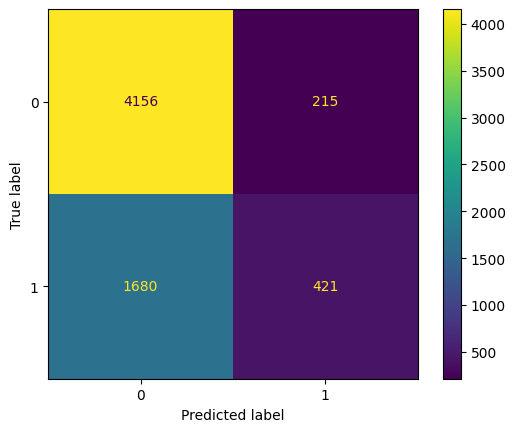

In [115]:
print(' Train CM \n')
cm_sgd = confusion_matrix(y_train, y_train_pred_sgd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_sgd)
disp.plot()
plt.show()

# Modelo 3

In [51]:
centroids_param_grid = {'metric':['euclidean', 'manhattan'],
                        'priors': ['uniform', 'empirical']

                  }
centroids_grid = GridSearchCV(NearestCentroid(), centroids_param_grid, refit = True, verbose = 3)



In [52]:
centroids_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..metric=euclidean, priors=uniform;, score=0.649 total time=   0.0s
[CV 2/5] END ..metric=euclidean, priors=uniform;, score=0.625 total time=   0.0s
[CV 3/5] END ..metric=euclidean, priors=uniform;, score=0.604 total time=   0.0s
[CV 4/5] END ..metric=euclidean, priors=uniform;, score=0.626 total time=   0.0s
[CV 5/5] END ..metric=euclidean, priors=uniform;, score=0.599 total time=   0.0s
[CV 1/5] END metric=euclidean, priors=empirical;, score=0.717 total time=   0.0s
[CV 2/5] END metric=euclidean, priors=empirical;, score=0.705 total time=   0.0s
[CV 3/5] END metric=euclidean, priors=empirical;, score=0.709 total time=   0.0s
[CV 4/5] END metric=euclidean, priors=empirical;, score=0.707 total time=   0.0s
[CV 5/5] END metric=euclidean, priors=empirical;, score=0.713 total time=   0.0s
[CV 1/5] END ..metric=manhattan, priors=uniform;, score=0.680 total time=   0.0s
[CV 2/5] END ..metric=manhattan, priors=uniform;,

GridSearchCV(estimator=NearestCentroid(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'priors': ['uniform', 'empirical']},
             verbose=3)

In [53]:
# print best parameter after tuning
print(centroids_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(centroids_grid.best_estimator_)

{'metric': 'euclidean', 'priors': 'empirical'}
NearestCentroid(priors='empirical')


In [54]:
y_train_pred_centroids = centroids_grid.predict(X_train)

In [55]:
print(' Train Report \n')
print(classification_report(y_train, y_train_pred_centroids, target_names=['positive','negative']))

 Train Report 

              precision    recall  f1-score   support

    positive       0.73      0.92      0.81      4371
    negative       0.63      0.29      0.40      2101

    accuracy                           0.71      6472
   macro avg       0.68      0.60      0.61      6472
weighted avg       0.70      0.71      0.68      6472



 Train CM 



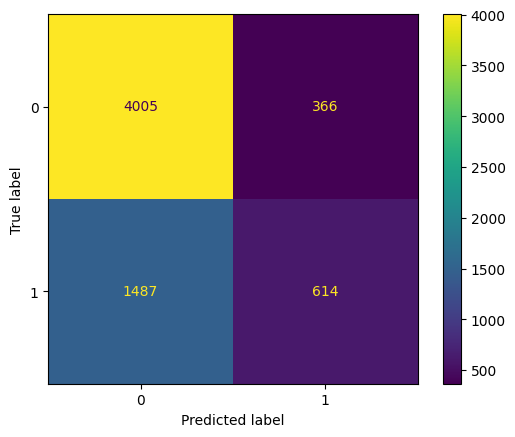

In [56]:
print(' Train CM \n')
cm_knn = confusion_matrix(y_train, y_train_pred_centroids)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.show()

In [57]:
y_val_pred_centroids = centroids_grid.predict(X_val)

In [58]:
print(' Train Report \n')
print(classification_report(y_val, y_val_pred_centroids, target_names=['positive','negative']))

 Train Report 

              precision    recall  f1-score   support

    positive       0.73      0.92      0.81       875
    negative       0.64      0.30      0.41       420

    accuracy                           0.72      1295
   macro avg       0.68      0.61      0.61      1295
weighted avg       0.70      0.72      0.68      1295



##Logistic Regresion
La Regresión Logística es un modelo estadístico utilizado principalmente para problemas de clasificación binaria. A diferencia de la regresión lineal, que se usa para predecir valores continuos, la regresión logística se emplea para predecir la probabilidad de pertenencia de una observación a una de dos posibles categorías.

La Regresión Logística es ampliamente utilizada en diversas áreas para resolver problemas de clasificación, tales como:
*   Diagnóstico Médico: Clasificación de pacientes en base a la presencia o ausencia de una enfermedad
*   Marketing: Predicción de si un cliente comprará o no un producto.
*   Finanzas: Evaluación del riesgo crediticio y predicción de la probabilidad de incumplimiento de pago.
* Seguridad Informática: Detección de correos electrónicos de spam o no spam.
* La Regresión Logística es una herramienta poderosa debido a su simplicidad, interpretabilidad y capacidad para manejar problemas de clasificación binaria eficientemente.

In [165]:
# se revisan las dimensiones:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6472, 18)
(5177, 18)
(6472, 1)
(5177, 1)


In [166]:
model = LogisticRegression(random_state = 24, max_iter = 20000)
params_to_tune = [ {'C': [1e-4, 1e-2, 1e-1,1,10, 100, 1000] },
                   {'tol': [ 1e-4, 1e-3,100,1000 ]},

                  ]

cv_object = GridSearchCV(model , params_to_tune, scoring = 'accuracy',n_jobs=-1)

cv_object.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=20000, random_state=24),
             n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100, 1000]},
                         {'tol': [0.0001, 0.001, 100, 1000]}],
             scoring='accuracy')

In [178]:
# usando Grid SearchCV nos entrega los mejores parametros para nuestro modelo
final_model = cv_object.best_estimator_

preds = final_model.predict(X_test)

print('Accuracy Score : ', accuracy_score(y_test, preds))

Accuracy Score :  0.7114158779215762


In [177]:
#Sin embargo revisamos los resultados y cambiamos los parametros para la revision sin penalidad para comprobar nuestro mejor estimador
model = LogisticRegression(random_state= 24,penalty=None).fit(X_train, y_train)
preds = model.predict(X_test)
accuracy = accuracy_score(y_test,preds)
print("Accuracy of model is : ",accuracy)

Accuracy of model is :  0.7133474985512845


In [176]:
# si usamos max iter = 5000 y liblinear con penealidad l1
model = LogisticRegression(random_state= 24,max_iter = 5000, solver = 'liblinear', penalty = 'l1')
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy = accuracy_score(y_test,preds)
print("Accuracy of model is : ",accuracy)

Accuracy of model is :  0.713926984740197


In [170]:
#utilizando el maximo de interaciones 5000
model = LogisticRegression(random_state= 24,max_iter = 5000)
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy = accuracy_score(y_test,preds)
print("Accuracy of model is : ",accuracy)

Accuracy of model is :  0.7131543364883137


In [179]:
# si escalamos antes de las transformaciones
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [183]:
model = LogisticRegression(random_state= 24,max_iter = 5000, solver = 'liblinear', penalty = 'l1')
model.fit(X_train_scaled ,y_train)
preds = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test,preds)
print("Accuracy of model is : ",accuracy)

Accuracy of model is :  0.7135406606142554


In [182]:
from sklearn.model_selection import RandomizedSearchCV
#El proceso de GridSearchCV que ya estás usando es muy útil, pero podríamos intentar una búsqueda más amplia o utilizar RandomizedSearchCV para explorar más combinaciones.
param_grid = {
    'C': [1e-4, 1e-2, 1e-1, 1, 10, 100, 1000],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [2000, 5000, 10000]
}

cv_random = RandomizedSearchCV(LogisticRegression(random_state=24), param_grid, scoring='accuracy', n_iter=50, cv=5, n_jobs=-1, random_state=42)
cv_random.fit(X_train_scaled, y_train)
best_model = cv_random.best_estimator_

preds = best_model.predict(X_test_scaled)
print('Best Hyperparameters:', cv_random.best_params_)
print('Accuracy Score :', accuracy_score(y_test, preds))


Best Hyperparameters: {'solver': 'liblinear', 'max_iter': 5000, 'C': 0.0001}
Accuracy Score : 0.7125748502994012


In [181]:
model = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga', max_iter=10000, random_state=24)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, preds)
print("Accuracy of model is : ", accuracy)

Accuracy of model is :  0.7133474985512845


Dado los resultados del modelos de Logistic regresion nos entrega una presicion del 71%, indica que el modelo tiene una precisión razonablemente buena. Cambiando incluso los parametros no se muestra un incremento del resultado, de igual manera con los datos escalados se mantiene el porcentaje inicial.

# Conclusiones

# Referencias

1. Support Vector classifier. (n.d.). https://apmonitor.com/pds/index.php/Main/SupportVectorClassifier